In [1]:
%matplotlib inline
from fastai.basics import *

In this part of the lecture we explain Stochastic Gradient Descent (SGD) which is an **optimization** method commonly used in neural networks. We will illustrate the concepts with concrete examples.

#  Linear Regression problem

The goal of linear regression is to fit a line to a set of points.

In [2]:
n=100

In [3]:
x = torch.ones(n,2) #make a dataset of 1's 100rows by 2cols
x[:,0].uniform_(-1.,1) #replace all in the first col with values between -1 and 1
x[:5]

tensor([[-0.1386,  1.0000],
        [-0.3284,  1.0000],
        [ 0.0598,  1.0000],
        [-0.1327,  1.0000],
        [-0.6470,  1.0000]])

We are creating a rank 1 tensor, aka a vector. 

In [4]:
a = tensor(3.,2); a #the coefficients/parameters/weights: the slope and intercept of our line

tensor([3., 2.])

In [12]:
what = x@a
print(what)


tensor([ 1.5842,  1.0148,  2.1795,  1.6019,  0.0590,  2.2116,  4.9738,  0.5389,
         1.0350, -0.4651,  3.9003,  2.8784,  4.1654,  4.6382,  4.9475,  1.5623,
         3.9035,  4.3867, -0.7674,  4.3157,  3.0682,  3.6276, -0.7808,  2.2251,
         4.0048, -0.1490,  0.9483, -0.8874, -0.4704, -0.3072,  0.1554,  2.7938,
         1.7553,  3.9640,  0.8354,  0.1037,  4.6803,  2.9436,  4.6556,  3.1949,
        -0.3135, -0.6088,  0.0577,  2.1964,  0.2202,  4.2060,  1.4030,  0.9579,
         3.6419, -0.4691, -0.4921, -0.7512,  4.0973,  1.4355,  0.6248,  2.8020,
         0.7739,  0.2192,  0.5242, -0.1561,  2.6840,  3.3950,  0.1892,  2.4252,
         0.1842,  3.3879,  2.9940,  2.5030,  2.8421,  2.6362,  2.8592,  4.8137,
         3.9103,  4.5863,  2.2162,  0.0689, -0.2344,  3.4155,  2.9790,  1.4215,
         2.3554,  3.5002,  3.3488,  1.3402,  2.2846,  2.9933,  2.9682,  3.3100,
         3.8912,  2.3260,  0.1899,  0.7512,  4.0994,  2.8083, -0.2665,  1.7472,
         1.6300, -0.5170,  2.9001,  2.87

-0.4158

x@a in Python means a matrix product between x and a. 

What is matrix multiplication, [check out this site](http://matrixmultiplication.xyz/). 

This is basically the key thing that’s going to go on in all of our deep learning. The vast majority of the time, our computers are going to be basically doing this﹣multiplying numbers together and adding them up which is the surprisingly useful thing to do.

yi = a1 . xi,1 + a2 . xi,2

In [15]:
y = x@a + torch.rand(n)

Jeremy mentioned that we’ve basically got these two coefficients 3 and 2. And you’ll see that we’ve wrapped it in this function called tensor(). 

A tensor is an array which has a rectangular or cube or whatever ﹣ a shape where every row is the same length and every column is the same length. The following are all tensors -

- A 4 by 3 matrix
- A vector of length 4
- A 3D array of length 3 by 4 by 6



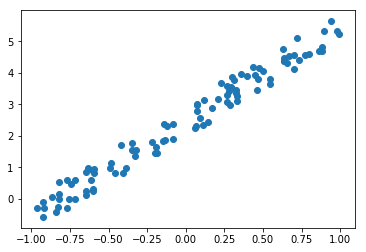

In [16]:
plt.scatter(x[:,0], y);

You want to find **parameters** (weights) `a` such that you minimize the *error* between the points and the line `x@a`. Note that here `a` is unknown. For a regression problem the most common *error function* or *loss function* is the **mean squared error**. 

In [17]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

Suppose we believe `a = (-1.0,1.0)` then we can compute `y_hat` which is our *prediction* and then compute our error.

In [18]:
a = tensor(-1.,1)

In [19]:
y_hat = x@a
mse(y_hat, y)

tensor(7.2010)

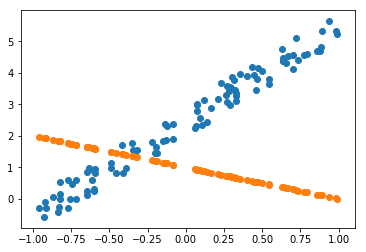

In [20]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

So far we have specified the *model* (linear regression) and the *evaluation criteria* (or *loss function*). Now we need to handle *optimization*; that is, how do we find the best values for `a`? How do we find the best *fitting* linear regression.

# Gradient Descent

We would like to find the values of `a` that minimize `mse_loss`.

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Here is gradient descent implemented in [PyTorch](http://pytorch.org/).

In [21]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [22]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

In [23]:
lr = 1e-1
for t in range(100): update()

tensor(7.2010, grad_fn=<MeanBackward1>)
tensor(1.4580, grad_fn=<MeanBackward1>)
tensor(0.4451, grad_fn=<MeanBackward1>)
tensor(0.1805, grad_fn=<MeanBackward1>)
tensor(0.1099, grad_fn=<MeanBackward1>)
tensor(0.0910, grad_fn=<MeanBackward1>)
tensor(0.0860, grad_fn=<MeanBackward1>)
tensor(0.0846, grad_fn=<MeanBackward1>)
tensor(0.0843, grad_fn=<MeanBackward1>)
tensor(0.0842, grad_fn=<MeanBackward1>)


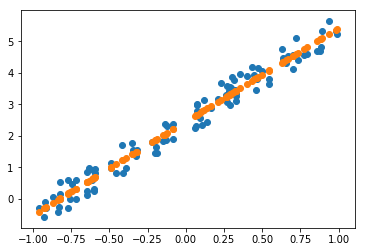

In [24]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a);

## Animate it!

In [25]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [26]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a)
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

In practice, we don't calculate on the whole file at once, but we use *mini-batches*.

## Vocab

- Learning rate
- Epoch
- Minibatch
- SGD
- Model / Architecture
- Parameters
- Loss function

For classification problems, we use *cross entropy loss*, also known as *negative log likelihood loss*. This penalizes incorrect confident predictions, and correct unconfident predictions.